In [1]:
SUFFIX = 'Afilt32m70_01'

## Correlate genetic and epigenetic distances

In [2]:
head dist.manhat.10.csv

"SeqNum.row","SeqNum.col","dist.manh","SampNum.row","SampNum.col"
1,1,0,"hc1_2","hc1_2"
1,15,61585.2861697132,"ss3_15","hc1_2"
1,3,63326.4707078669,"hc2_15","hc1_2"
1,17,62843.2969786156,"ss3_20","hc1_2"
1,4,61293.3577920059,"hc2_17","hc1_2"
1,2,66252.1162566745,"hc1_4","hc1_2"
1,7,64674.3615808263,"hc3_7","hc1_2"
1,16,61196.1289873634,"ss3_16","hc1_2"
1,14,60946.4385459417,"ss3_14","hc1_2"


In [13]:
#read in epigenetic Manhattan distance, 10 coverage 
library(spaa)
ep10 <-read.csv("Results/dist.manhat.10.csv",header = T)
ep10 <- ep10[,c("SampNum.row","SampNum.col","dist.manh")]
ep10 <- as.matrix(list2dist(ep10))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep10 <- ep10[mbdorder, mbdorder]
ep10
Dep10 <- as.dist(ep10)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.00,66252.12,63326.47,61293.36,72731.29,64393.90,64674.36,61647.30,68848.72,64588.18,63436.73,75468.91,62062.63,60946.44,61585.29,61196.13,62843.30,64232.22
hc1_4,66252.12,0.00,64114.31,60874.81,71726.97,70152.64,64213.16,65236.04,70534.66,66619.45,65887.63,74782.61,63253.10,63830.86,63684.52,64321.91,64481.35,66049.12
hc2_15,63326.47,64114.31,0.00,58478.77,71155.90,68447.28,59986.64,62803.71,68581.21,64535.96,61769.04,76040.02,61236.64,60781.94,60180.65,61962.05,62646.47,64872.10
hc2_17,61293.36,60874.81,58478.77,0.00,71482.29,66395.27,59747.32,59015.61,68873.90,62859.73,58716.36,76514.13,59935.18,58958.65,56365.90,60734.77,60100.41,63581.42
hc3_1,72731.29,71726.97,71155.90,71482.29,0.00,75048.67,67495.37,74586.46,73111.54,70927.93,73406.09,74996.13,70299.57,71327.41,73627.55,71063.67,71962.13,70504.04
hc3_5,64393.90,70152.64,68447.28,66395.27,75048.67,0.00,70565.36,65162.88,73601.42,70117.99,68951.02,78371.43,66271.16,66853.85,67202.54,68162.36,67766.62,69278.27
hc3_7,64674.36,64213.16,59986.64,59747.32,67495.37,70565.36,0.00,65023.88,68148.93,63417.00,62329.81,76178.02,61760.16,60973.85,60572.29,62172.65,62566.91,64609.59
hc3_10,61647.30,65236.04,62803.71,59015.61,74586.46,65162.88,65023.88,0.00,72470.33,66762.72,61810.26,78218.92,61529.73,61307.07,58208.83,62895.70,60869.16,65996.22
hc3_11,68848.72,70534.66,68581.21,68873.90,73111.54,73601.42,68148.93,72470.33,0.00,66890.19,69852.81,74319.42,65178.92,65162.47,69248.06,66419.15,67027.66,66909.43
ss2_9,64588.18,66619.45,64535.96,62859.73,70927.93,70117.99,63417.00,66762.72,66890.19,0.00,57562.81,69048.84,56378.01,56871.76,60111.91,57074.62,59368.27,60441.64


In [11]:
%expand
# read in genetic distances
gen <- read.table("Results/{SUFFIX}_mbd.dist", row.names = 1, header=T)
gen
Dgen <- as.dist(gen)
Dgen

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.0000000,0.2023222,0.1963290,0.2129628,0.2024981,0.1192461,0.2032492,0.1827543,0.2075678,0.2063262,0.2085351,0.2105634,0.2146845,0.2142404,0.2150685,0.2136523,0.2103820,0.2235715
hc1_4,0.2023222,0.0000000,0.1771144,0.1604287,0.1717957,0.1959832,0.1518007,0.1966787,0.2048725,0.2092934,0.2087717,0.2042154,0.2169115,0.2130224,0.2143112,0.2082315,0.2038520,0.2161878
hc2_15,0.1963290,0.1771144,0.0000000,0.1938730,0.1775741,0.1935887,0.1741291,0.1535171,0.2061692,0.1955954,0.2009525,0.1834992,0.1946711,0.1953913,0.1983889,0.1947530,0.1917160,0.1997755
hc2_17,0.2129628,0.1604287,0.1938730,0.0000000,0.1783283,0.2035776,0.1635526,0.2041895,0.2124525,0.2124898,0.2137228,0.2134137,0.2227654,0.2187251,0.2246483,0.2136275,0.2155611,0.2236084
hc3_1,0.2024981,0.1717957,0.1775741,0.1783283,0.0000000,0.1971289,0.1087611,0.1957820,0.1980694,0.2087702,0.2077617,0.2028169,0.2132566,0.2066287,0.2152056,0.2094276,0.2071587,0.2045432
hc3_5,0.1192461,0.1959832,0.1935887,0.2035776,0.1971289,0.0000000,0.1995346,0.1772506,0.2041739,0.2087016,0.2053285,0.2078587,0.2100327,0.2065308,0.2114087,0.2092314,0.2105458,0.2125568
hc3_7,0.2032492,0.1518007,0.1741291,0.1635526,0.1087611,0.1995346,0.0000000,0.1999381,0.2039236,0.2105172,0.2135472,0.2116604,0.2147010,0.2132778,0.2169324,0.2121843,0.2134874,0.2170904
hc3_10,0.1827543,0.1966787,0.1535171,0.2041895,0.1957820,0.1772506,0.1999381,0.0000000,0.2041366,0.1973513,0.2030168,0.1945122,0.1953693,0.1981140,0.1813731,0.2037904,0.1955729,0.2006616
hc3_11,0.2075678,0.2048725,0.2061692,0.2124525,0.1980694,0.2041739,0.2039236,0.2041366,0.0000000,0.2095652,0.2099878,0.2080718,0.2232199,0.2111053,0.2183356,0.2158649,0.2068435,0.2153289
ss2_9,0.2063262,0.2092934,0.1955954,0.2124898,0.2087702,0.2087016,0.2105172,0.1973513,0.2095652,0.0000000,0.1420055,0.1566095,0.1485755,0.1555472,0.1994546,0.1565957,0.1944261,0.1652972


           hc1_2     hc1_4    hc2_15    hc2_17     hc3_1     hc3_5     hc3_7
hc1_4  0.2023222                                                            
hc2_15 0.1963290 0.1771144                                                  
hc2_17 0.2129628 0.1604287 0.1938730                                        
hc3_1  0.2024981 0.1717957 0.1775741 0.1783283                              
hc3_5  0.1192461 0.1959832 0.1935887 0.2035776 0.1971289                    
hc3_7  0.2032492 0.1518007 0.1741291 0.1635526 0.1087611 0.1995346          
hc3_10 0.1827543 0.1966787 0.1535171 0.2041895 0.1957820 0.1772506 0.1999381
hc3_11 0.2075678 0.2048725 0.2061692 0.2124525 0.1980694 0.2041739 0.2039236
ss2_9  0.2063262 0.2092934 0.1955954 0.2124898 0.2087702 0.2087016 0.2105172
ss2_14 0.2085351 0.2087717 0.2009525 0.2137228 0.2077617 0.2053285 0.2135472
ss2_18 0.2105634 0.2042154 0.1834992 0.2134137 0.2028169 0.2078587 0.2116604
ss3_3  0.2146845 0.2169115 0.1946711 0.2227654 0.2132566 0.2100327 0.2147010


Call:
lm(formula = Dep10 ~ Dgen)

Residuals:
     Min       1Q   Median       3Q      Max 
-11172.0  -4271.0   -893.2   4480.7  13513.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    51938       3784  13.725  < 2e-16 ***
Dgen           65639      19327   3.396 0.000873 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5864 on 151 degrees of freedom
Multiple R-squared:  0.07097,	Adjusted R-squared:  0.06481 
F-statistic: 11.53 on 1 and 151 DF,  p-value: 0.0008733


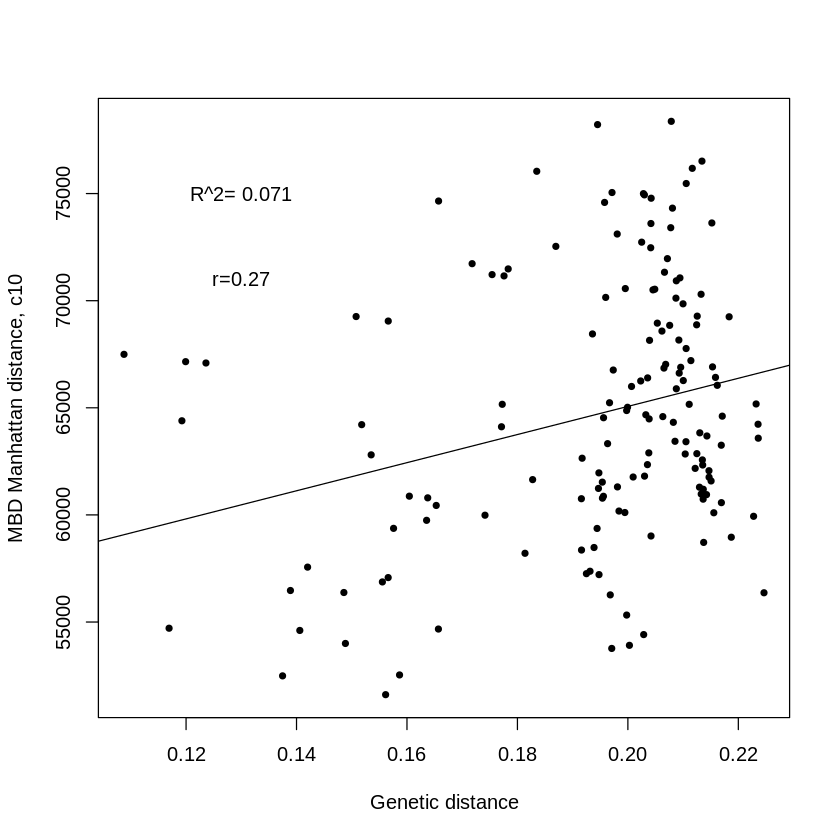

In [31]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep10, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance, c10")
summary(lm(Dep10~Dgen),)
R2 = round(summary(lm(Dep10~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep10~Dgen))
text(0.13,75000,label=paste("R^2=",R2))
text(0.13,71000,label="r=0.27")

In [32]:
cor.test( ~ Dep10 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep10 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep10 and Dgen
t = 3.3962, df = 151, p-value = 0.0008733
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1124714 0.4078338
sample estimates:
      cor 
0.2663952 



	Spearman's rank correlation rho

data:  Dep10 and Dgen
S = 467968, p-value = 0.007425
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2160079 


In [17]:
#read in epigenetic Manhattan distance, 5 coverage 
ep5 <-read.csv("Results/dist.manhat.5.csv",header = T)
ep5 <- ep5[,c("SampNum.row","SampNum.col","dist.manh")]
ep5 <- as.matrix(list2dist(ep5))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep5 <- ep5[mbdorder, mbdorder]
ep5
Dep5 <- as.dist(ep5)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.0,785465.3,761202.1,736427.8,859233.1,759976.1,769916.3,714310.8,801494.5,764354.3,731066.6,881550.6,728085.9,720065.7,710872.4,729092.0,738666.6,769260.2
hc1_4,785465.3,0.0,762397.1,721468.0,844406.1,830847.7,759973.9,761658.4,814664.0,795989.0,766223.0,886200.4,759823.8,749732.5,749007.7,765132.3,764925.4,784523.9
hc2_15,761202.1,762397.1,0.0,697631.3,835847.1,814356.9,717774.0,742497.2,803140.5,770721.7,728432.6,892047.8,729524.5,719090.0,711810.0,732617.9,743467.7,768125.8
hc2_17,736427.8,721468.0,697631.3,0.0,834367.8,788526.2,711425.7,695469.1,791344.1,742814.2,694521.3,880045.7,703374.5,691199.1,664094.6,704550.7,706413.2,747557.0
hc3_1,859233.1,844406.1,835847.1,834367.8,0.0,891160.6,792205.2,850603.0,867967.5,859283.3,851044.6,911420.0,832573.2,827708.6,835400.0,838662.3,842258.0,841495.8
hc3_5,759976.1,830847.7,814356.9,788526.2,891160.6,0.0,830791.3,751664.6,857808.9,826131.2,795416.2,916928.4,801893.0,789905.0,774815.3,804143.5,796950.6,823257.6
hc3_7,769916.3,759973.9,717774.0,711425.7,792205.2,830791.3,0.0,755035.5,802034.6,768620.4,737344.7,887217.8,725916.3,717720.5,717536.4,730731.6,749562.7,771312.8
hc3_10,714310.8,761658.4,742497.2,695469.1,850603.0,751664.6,755035.5,0.0,808170.9,759604.6,698519.8,890381.9,723431.8,703588.1,671282.0,718089.3,711032.0,761274.7
hc3_11,801494.5,814664.0,803140.5,791344.1,867967.5,857808.9,802034.6,808170.9,0.0,783897.3,785703.4,868859.1,752921.4,746074.2,768918.4,757687.4,772318.1,779123.6
ss2_9,764354.3,795989.0,770721.7,742814.2,859283.3,826131.2,768620.4,759604.6,783897.3,0.0,669634.2,821399.6,651476.4,656592.0,692697.5,661445.4,708344.5,719305.8



Call:
lm(formula = Dep5 ~ Dgen)

Residuals:
    Min      1Q  Median      3Q     Max 
-132589  -49331   -4639   56823  148288 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   604032      43892  13.762  < 2e-16 ***
Dgen          791924     224165   3.533 0.000546 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68010 on 151 degrees of freedom
Multiple R-squared:  0.07634,	Adjusted R-squared:  0.07023 
F-statistic: 12.48 on 1 and 151 DF,  p-value: 0.0005458


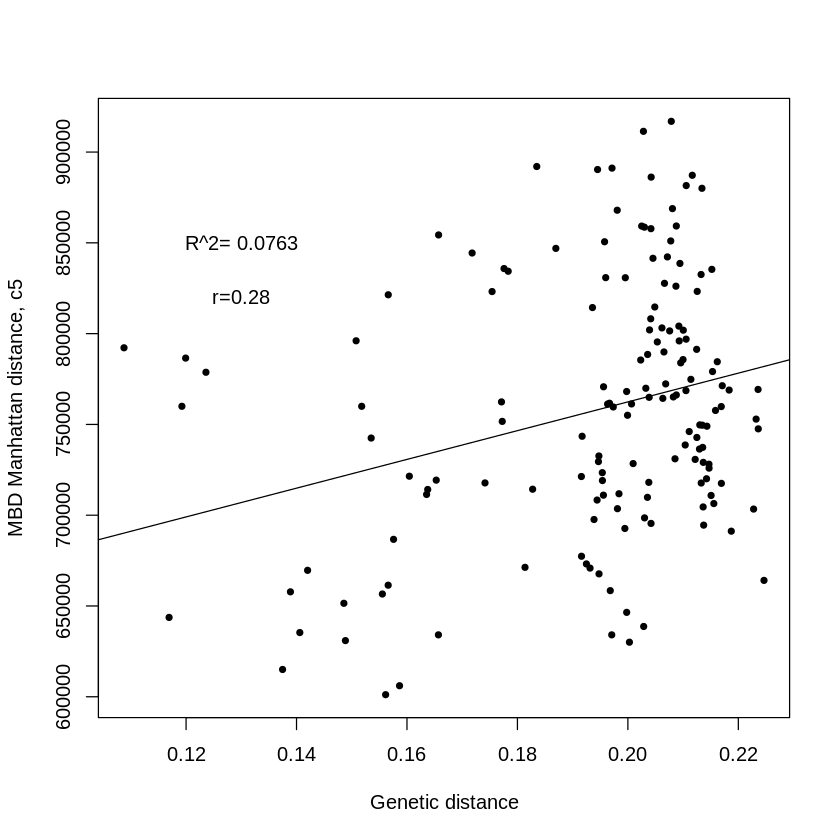

In [30]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep5, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance, c5")
summary(lm(Dep5~Dgen))
R2 = round(summary(lm(Dep5~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep5~Dgen))
text(0.13,850000,label=paste("R^2=",R2))
text(0.13,820000,label="r=0.28")

In [28]:
cor.test( ~ Dep5 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep5 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep5 and Dgen
t = 3.5328, df = 151, p-value = 0.0005458
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1230168 0.4167098
sample estimates:
      cor 
0.2763015 



	Spearman's rank correlation rho

data:  Dep5 and Dgen
S = 472072, p-value = 0.009585
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2091325 
